# Predict DAX30 Stocks Prices

This is the first notebook from the capstone project for the Machine Learning Nanodegree from Udacity. 

# Data Exploration - Analysis

In this notebook we are going to explore and analyse the data from the stocks. 

Firstly, we will explore the library and the data for just one symbol and after that, we will check and compare stats and data for all the companies.

In [185]:
# to download the data for the stocks
import yfinance as yf 

# to process the data
import pandas as pd
import numpy as np

# to visualize the data
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot, lag_plot

from utils.data.data_config import LIST_DAX_COMPANIES
from utils.data_preprocessing import impute_data_points 

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error

### Downloading the data from Yfinance

To download the data we will use the library _yfinance_ as Yahoo did stop their finance API.

Find more about the library yfinance [here](https://pypi.org/project/yfinance/)

Let's start with one symbol and we will move afterwards to more of them. 
We will focus our exploration in `Adj Close` as it's our prediction target.

In [14]:
data_dher = yf.download("DHER.DE", start="2017-01-01", end="2021-02-01")

[*********************100%***********************]  1 of 1 completed


In [17]:
data_dher.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-30,26.900000,27.799999,25.260000,27.799999,27.799999,11407039
2017-07-03,28.250000,28.750000,27.250000,27.500000,27.500000,496331
2017-07-04,27.500000,27.770000,26.805000,26.950001,26.950001,172959
2017-07-05,26.980000,27.280001,25.424999,25.549999,25.549999,251146
2017-07-06,25.650000,26.225000,25.594999,25.900000,25.900000,164755
2017-07-07,25.959999,26.500000,25.815001,26.250000,26.250000,118722
2017-07-10,26.370001,26.889999,26.100000,26.549999,26.549999,133496
2017-07-11,26.850000,27.250000,26.725000,27.200001,27.200001,183557
2017-07-12,27.500000,28.490000,27.400000,28.200001,28.200001,70912


Just from visualizing the 10 first rows of the dataset, we observe that not all the days are included. We are missing dates from `2017-07-07` to `2017-07-10`, basically the weekends or holdiays are not included. We will have to explore some imputation methods in order to add the recover the missing data.

In [18]:
data_dher.describe()

,Open,High,Low,Close,Adj Close,Volume
count,904.000000,904.000000,904.000000,904.000000,904.000000,9.040000e+02
mean,54.276222,55.216687,53.275454,54.290470,54.290470,4.248412e+05
std,26.593579,27.237353,25.987589,26.657213,26.657213,5.646928e+05
min,25.650000,26.225000,25.260000,25.549999,25.549999,0.000000e+00
25%,35.454999,35.779999,34.980000,35.490000,35.490000,2.314682e+05
50%,41.400002,41.924999,40.840000,41.359999,41.359999,3.454175e+05
75%,70.014999,71.240002,68.535002,70.000000,70.000000,4.961772e+05
max,144.649994,145.399994,138.149994,144.100006,144.100006,1.140704e+07


From this description of the dataset, we don't see any differences from `Close` to `Adj Close` in mean or standard deviation. Let's visualize our target variable with a boxplot.

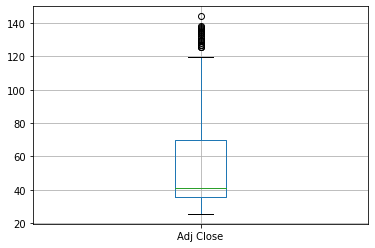

In [22]:
data_dher[['Adj Close']].boxplot();

From this graph we see that the mean is close to the 1st quartile, what means that our series has been longer time period in lower values and at some point it got a big increament till the maximum values. We get a very good overview of the performance of this serie but we don't really know if the increment was constant, fast, slow, and the current value of the serie. For that we will visualize the full timeserie to understand more it.

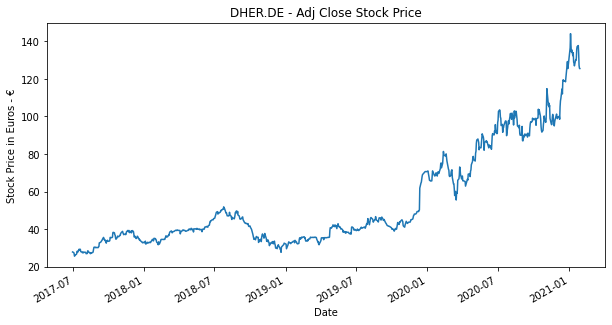

In [23]:
data_dher['Adj Close'].plot(figsize=(10,5))
plt.ylabel('Stock Price in Euros - €')
plt.title('DHER.DE - Adj Close Stock Price');

As we imagine, the serie had longer period in lower values and then it had a big increament. We can know fully see that this increament has been recent and currently this symbol is in higher values.

Let's know investigate all the symbols to get a better sense of what is happening in the DAX 30. The list with all the symbols that belongs to DAX are included in the `utils/data/data_config.py`. We have imported this library at the beginning of the notebook.

The timeframe we will use is `2016-01-01` until the end of 2020, `2020-12-31`.

In [122]:
data = yf.download(" ".join(LIST_DAX_COMPANIES), 
                   start="2016-01-01", 
                   end="2020-12-31")

[*********************100%***********************]  30 of 30 completed


In [123]:
data.head(5)

Adj Close                                                          \
              1COV.DE     ADS.DE      ALV.DE     BAS.DE    BAYN.DE     BEI.DE   
Date                                                                            
2015-12-31        NaN        NaN         NaN        NaN        NaN        NaN   
2016-01-04  25.909983  80.298233  122.656189  50.431751  90.058891  78.003090   
2016-01-05  25.611298  80.023048  123.049294  50.148174  90.221092  78.849281   
2016-01-06  25.376333  79.096611  123.442451  49.312374  88.923515  78.339645   
2016-01-07  24.532045  77.867455  120.887100  48.110905  86.652786  76.426102   

                                                         ...     Volume  \
               BMW.DE      CON.DE     DAI.DE     DB1.DE  ...     IFX.DE   
Date                                                     ...              
2015-12-31        NaN         NaN        NaN        NaN  ...        NaN   
2016-01-04  73.104820  175.963272  55.673573  69.283241  ...  5888306.0   
2016-01-05  72.764061  177.066620  55.666012  69.070145  ...  5807472.0   
2016-01-06  70.354965  171.468170  54.252247  68.208878  ...  7959657.0   
2016-01-07  67.708130  167.299973  52.165627  66.584015  ...  7143489.0   

                                                                              \
           LIN.DE    MRK.DE  MTX.F    MURGY     RWE.DE     SAP.DE     SIE.DE   
Date                                                                           
2015-12-31    NaN       NaN    NaN  37900.0        NaN        NaN        NaN   
2016-01-04    0.0  578140.0  587.0  88800.0  5676324.0  4580799.0  4337692.0   
2016-01-05    0.0  451169.0   46.0  35400.0  4021303.0  2771848.0  2649739.0   
2016-01-06    0.0  401340.0   13.0  45300.0  3531979.0  3767568.0  2509210.0   
2016-01-07    0.0  630736.0  677.0  72400.0  4931613.0  4636705.0  4010217.0   

                                 
               VNA.DE    VOW.DE  
Date                             
2015-12-31        NaN       NaN  
2016-01-04  2015731.0  161437.0  
2016-01-05  1151990.0  317498.0  
2016-01-06  1384557.0  152408.0  
2016-01-07  2185327.0  227069.0  

[5 rows x 180 columns]

When we download all the data together, we see that it includes the last day of 2015. We will have to clean also the data appart from imputing the missing values. We also see that now we have 2 rows with column names. We are going to check the shape, columns type and we will analyse in the same way we did with just one symbol.

In [124]:
data.columns

MultiIndex([('Adj Close', '1COV.DE'),
            ('Adj Close',  'ADS.DE'),
            ('Adj Close',  'ALV.DE'),
            ('Adj Close',  'BAS.DE'),
            ('Adj Close', 'BAYN.DE'),
            ('Adj Close',  'BEI.DE'),
            ('Adj Close',  'BMW.DE'),
            ('Adj Close',  'CON.DE'),
            ('Adj Close',  'DAI.DE'),
            ('Adj Close',  'DB1.DE'),
            ...
            (   'Volume',  'IFX.DE'),
            (   'Volume',  'LIN.DE'),
            (   'Volume',  'MRK.DE'),
            (   'Volume',   'MTX.F'),
            (   'Volume',   'MURGY'),
            (   'Volume',  'RWE.DE'),
            (   'Volume',  'SAP.DE'),
            (   'Volume',  'SIE.DE'),
            (   'Volume',  'VNA.DE'),
            (   'Volume',  'VOW.DE')],
           length=180)

In [125]:
data.shape

(1291, 180)

In [126]:
data['Adj Close'].describe().T

,count,mean,std,min,25%,50%,75%,max
1COV.DE,1265.0,46.285010,14.204775,20.294693,35.830849,43.250000,56.982815,78.717293
ADS.DE,1265.0,192.910295,56.956183,76.546570,158.779449,186.029007,244.600006,309.818024
ALV.DE,1265.0,160.137163,29.722466,98.523102,139.849884,164.131836,181.539993,218.202454
BAS.DE,1265.0,59.410877,9.376671,34.059311,52.796947,57.702744,68.056503,78.570663
BAYN.DE,1265.0,73.984003,15.767488,40.360001,60.554451,74.371017,86.695511,107.656120
BEI.DE,1265.0,91.495840,9.261219,73.293762,84.227188,91.992706,97.757767,115.493759
BMW.DE,1265.0,66.379507,7.593557,35.660213,61.511070,66.556953,72.578941,82.866203
CON.DE,1265.0,140.205546,36.989802,49.555496,110.847580,144.961548,166.822281,218.441803
DAI.DE,1265.0,48.746119,7.584327,20.560038,44.721016,49.205326,54.834217,63.200882
DB1.DE,1265.0,104.525880,29.030849,60.580975,76.115021,106.216652,128.906143,169.000000


The dataset contains 1291 rows and 180 columns. As we will only use the 'Adj Close', we will reduce it to just this variable for all the symbols. 

From the description we see that we have a wide variety of mean stock price ranges. From `EOAN.DE` with 7 Euros mean to `ADS.DE` with 192 Euros.

Another interesting fact is that all the symbols contains 1265 rows except `DHER.DE`, that is 884. It may be because they went to IPO later as it is quite new company. We will have to take care of null values for this symbol when modelling it.

In [127]:
df = data['Adj Close'].copy()
df.shape

(1291, 30)

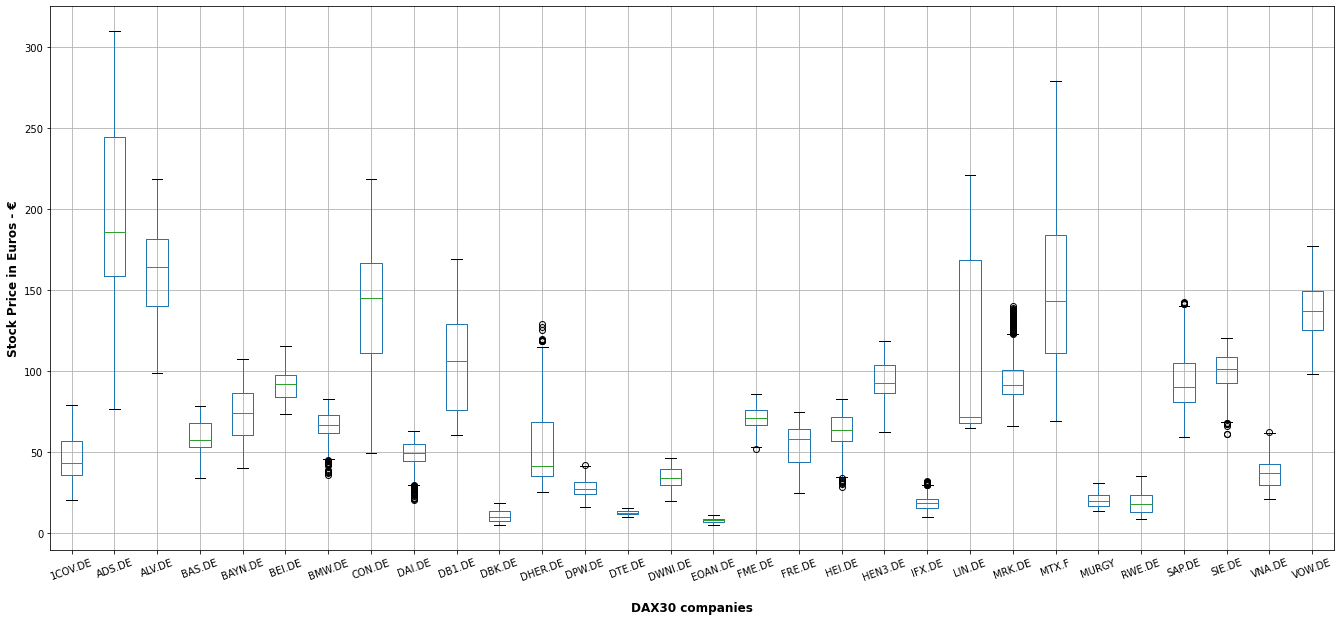

In [128]:
df.boxplot(figsize=(23,10), rot=20)
plt.xlabel("\nDAX30 companies", fontsize=12, fontweight='bold')
plt.ylabel("Stock Price in Euros - €", fontsize=12, fontweight='bold');

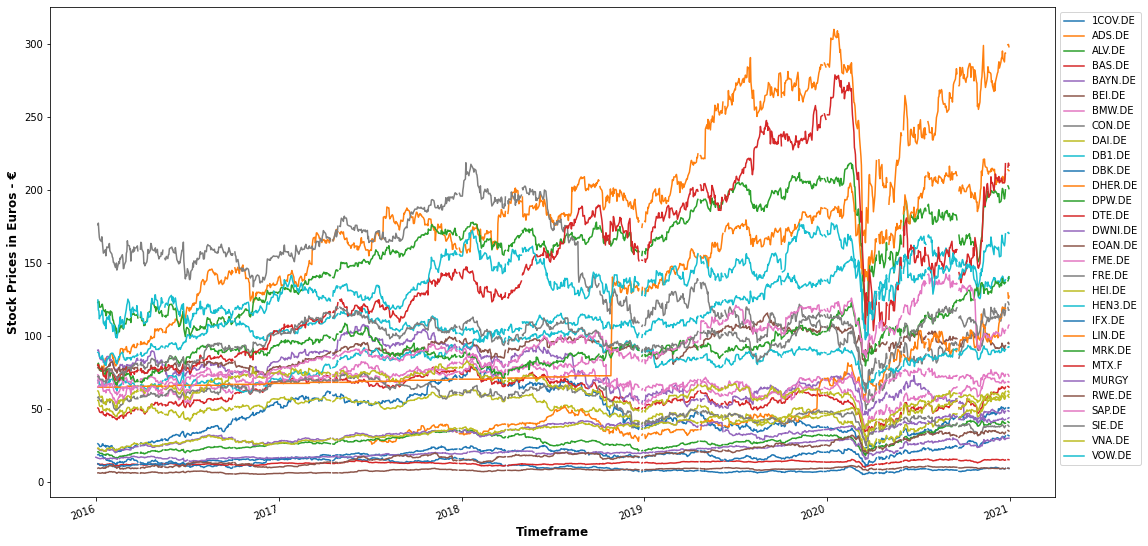

In [129]:
df.plot(figsize=(18,10), rot=20)
plt.xlabel("Timeframe", fontsize=12, fontweight='bold')
plt.ylabel("Stock Prices in Euros - €", fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1, 1));

We can see now more clearly the missing values in our series. Another significat notation is that big drop in march 2020 that correspond to the impact of COVID19. 

### Data preprocessing

As we mentioned, we have to fix the missing values in our series. One option is through imputation methods like interpolation. We can try two of the most common options:
- Linear
- Quadratic

We will also remove data points out of the timeframe we specify, to make sure we only include what we desire.

In [130]:
df = df[df.index >= '2016-01-01']

len_pre = len(df)
df = df.asfreq('D')

len_post = len(df)

In [131]:
data_dher = data_dher[data_dher.index <= '2020-12-31']

len_dh_pre = len(data_dher)
data_dher = data_dher.asfreq('D')

len_dh_post = len(data_dher)

In [132]:
print(f"Differences between total dates and the days presented in the dataset are: {len_post - len_pre} as total contains {len_post} and before the fix was {len_pre}.")
print(f"DHER.DE = Differences between total dates and the days presented in the dataset are: {len_dh_post - len_dh_pre} as total contains {len_dh_post} and before the fix was {len_dh_pre}.")

Differences between total dates and the days presented in the dataset are: 533 as total contains 1823 and before the fix was 1290.
DHER.DE = Differences between total dates and the days presented in the dataset are: 0 as total contains 1280 and before the fix was 1280.


It means we have to input 533 datapoints into a 1291 sample. It gives us a sample of 71% real data and 29% inputed data.

Now we will study the imputation methods for just one of the symbols, for example `1COV.DE`. Later on, we will apply the imputation methods to all the values. 
Imputation function is defined in `data_preprocessing.py` file. We have imported it at the beginning the notebook. 

However, in this exploration we will use directly the method in order to have assigned to a different column the imputation to evaluate the different methods: linear and quadratic.

In [133]:
symbol = '1COV.DE'
cov1 = df[[symbol]]

cov1 = cov1.assign(InterpolateLinear=cov1['1COV.DE'].interpolate(method='linear'))
cov1 = cov1.assign(InterpolateQuadratic=cov1['1COV.DE'].interpolate(method='quadratic'))

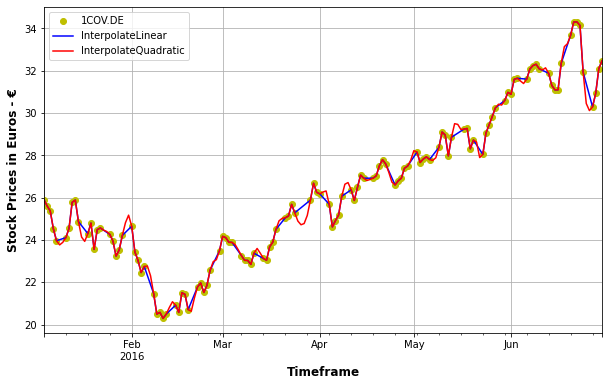

In [134]:
cov1[[symbol, 'InterpolateLinear', 
                 'InterpolateQuadratic']][cov1.index<'2016-07-01'].plot(style=['yo', 'b-', 'r-'], figsize=(10, 6))
# plt.title('1COV.DE time serie visualization with Imputation Methods - Year 2016', fontweight='bold')
plt.grid()
plt.xlabel("Timeframe", fontsize=12, fontweight='bold')
plt.ylabel("Stock Prices in Euros - €", fontsize=12, fontweight='bold');

We see very little differences in the graph beteween one method and the other. In order to understand which one performs better, we will evalute the RMSE metric from the ARIMA model for both methods, and we will keep the one that has the minimum RMSE. It has been done in the notebook `results.py`. The best/ minimum RMSE was with the linear model. From now on, we will be using this imputation method for the exploration.

In [135]:
df_imputed = impute_data_points(df)

## Data Analysis

In this part we are going to analyze the relationship between observation and other previous observation (lags). The stronger the correlation the best will predict one observation the next.

After that we will get more insights about the underlying distribution of our data. We will study this first for one symbol, for example `FME.DE` and later on, for all the 30 symbols.

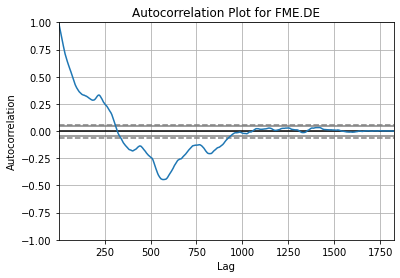

In [136]:
symbol = 'FME.DE'

autocorrelation_plot(df[symbol])
plt.title(f"Autocorrelation Plot for {symbol}");

There is an strong correlation until the ~50-80 lags (> 0.5). After we see the correlation weaker and after 2 years, the correlation is negative. 
We deduce that after 2 years, the stock priced did reduce and later on, the correlation is practically null.

In the next scatter plot with lags from 10 to 1000 we can see an strong positive correlation with the less number of lags. For the lag 100 we already see very big spread and already in lags 1000 we can not see any correlation at all, same as we just saw in the previous chart.

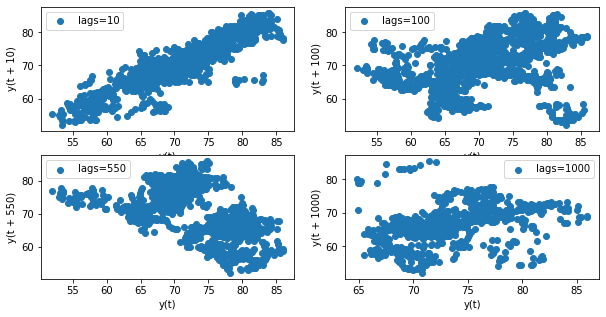

In [172]:
plt.figure(figsize=(10,5))
plots = []
lags = [10, 100, 550, 1000]
grids = [(0,0), (0,1), (1,0), (1,1)]

for lag, grid in zip(lags, grids):
        ax = plt.subplot2grid((2,2), grid)
        ax = lag_plot(df[symbol], lag=lag, label=f"lags={lag}");
        plt.legend()
plt.show()


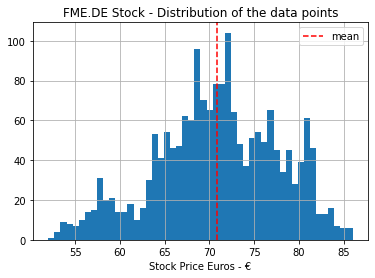

In [182]:
plt.title(f"{symbol} Stock - Distribution of the data points")
plt.xlabel("Stock Price Euros - €")
plt.axvline(df[symbol].mean(), color='red', ls='--', label='mean')
df[symbol].hist(bins=50)
plt.legend();

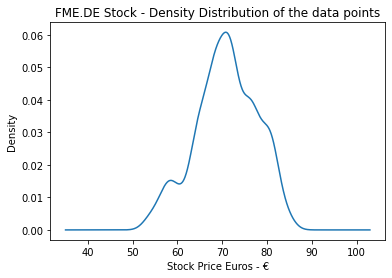

In [151]:
plt.title(f"{symbol} Stock - Density Distribution of the data points")
df[symbol].plot(kind='kde')
plt.xlabel("Stock Price Euros - €");

We can observe in this way if the series could follows a normal distribution. However, as it's not the goal in this notebook, we will understand the correlation for all the other symbols and their distribution to understand distribution peaks as the `FME.DE` that has one where the mean lies, but also another before 60 Euros price.

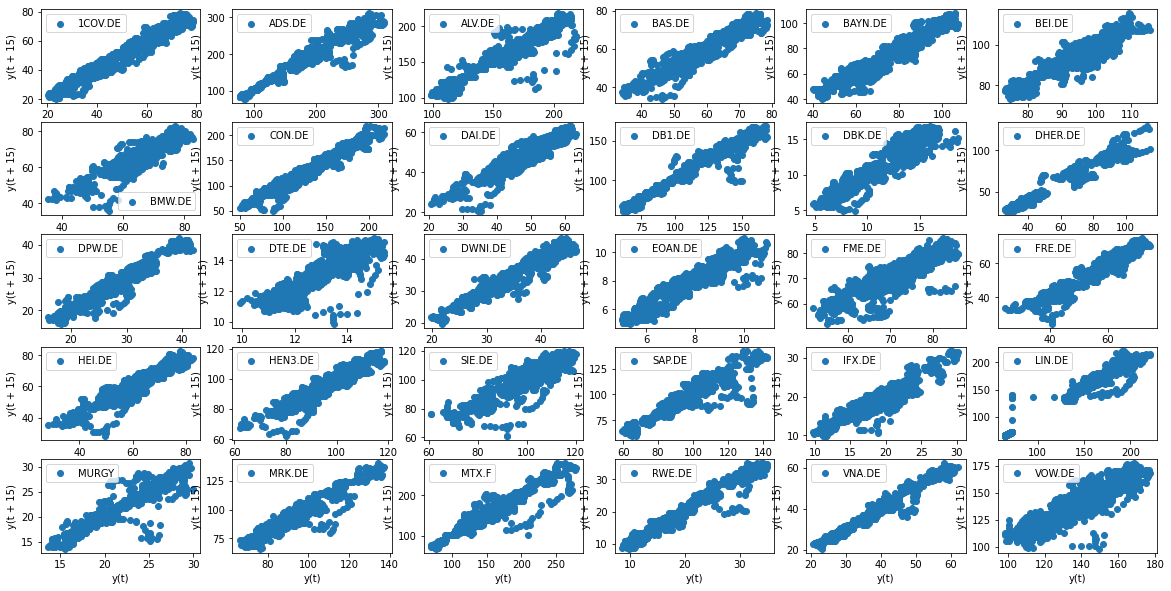

In [153]:
plt.figure(figsize=(20,10))
plots = []
k = 0
lag = 15

for i in range(5):
    for j in range(6):
        ax = plt.subplot2grid((5,6), (i,j))
        ax = lag_plot(df[LIST_DAX_COMPANIES[k]], lag=lag, label=LIST_DAX_COMPANIES[k])
        k += 1
        plt.legend()
plt.show()

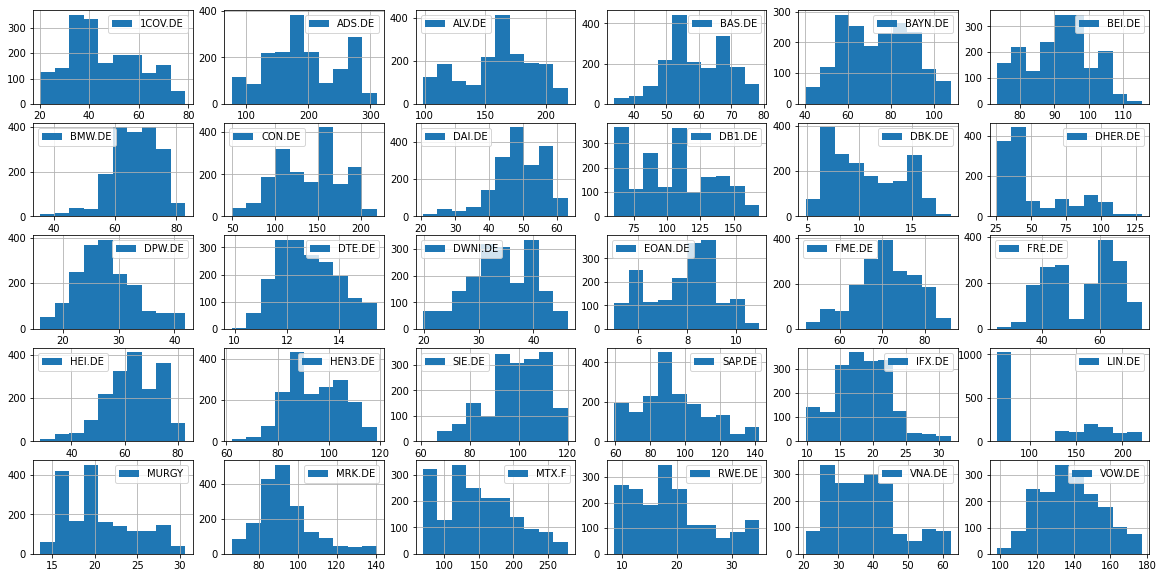

In [154]:
plt.figure(figsize=(20,10))
plots = []
k = 0

for i in range(5):
    for j in range(6):
        ax = plt.subplot2grid((5,6), (i,j))
        ax = df[LIST_DAX_COMPANIES[k]].hist(label=LIST_DAX_COMPANIES[k])
        k += 1
        plt.legend()

plt.show()

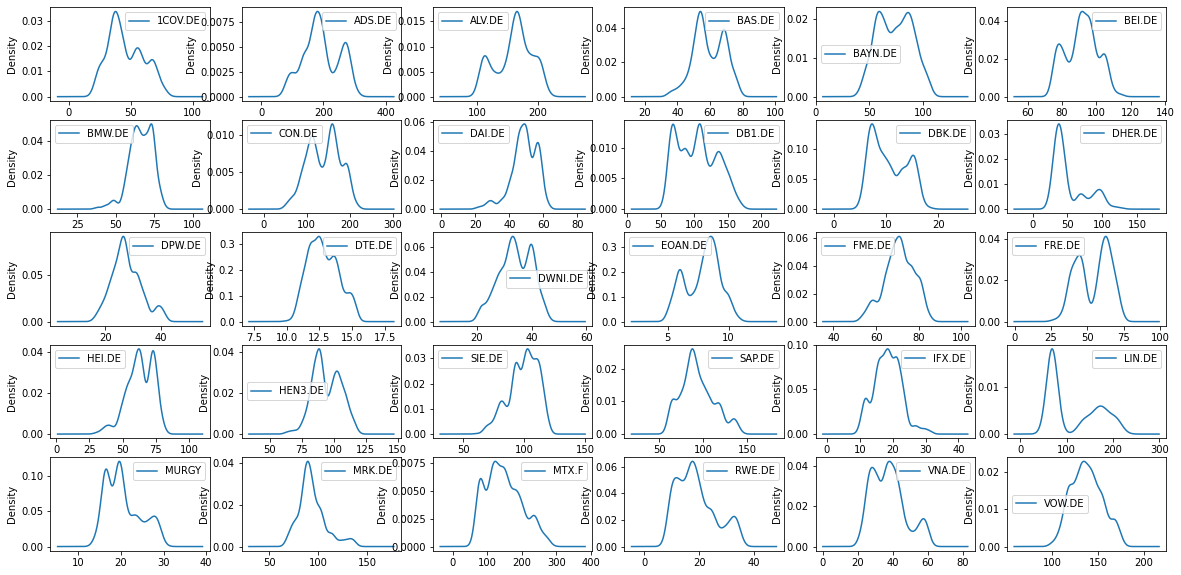

In [155]:
plt.figure(figsize=(20,10))
plots = []
k = 0

for i in range(5):

    for j in range(6):
        ax = plt.subplot2grid((5,6), (i,j))
        ax = df[LIST_DAX_COMPANIES[k]].plot(kind='kde', label=LIST_DAX_COMPANIES[k])
        k += 1
        plt.legend()

plt.show()

Based in this checks, we can confirm that ARIMA is going to be a good model to apply to his type of data as auto-correlation in the data exists.

## Metrics

The success of our model will be based on RMSE, that is root mean square errors and measures the differences between predicted values from a model and the actual observed values. For this, we will use `from sklearn.metrics import mean_squared_error` and we will apply the `math.square` to the result.

## Benchmark Model: ARIMA

ARIMA(p,d,q) model has 3 key aspects14:

- **Autoregression (AR)**. It uses the relationship between an observation and some number of lagged observations.
    - p parameter (lag order) defines the number of lag observations.
- **Integrated (I)**. It uses the differencing of raw observations to make the time series stationary.
    - d parameter (degree of differencing) defines the number of times the raw observations are differenced.
- **Moving Average (MA)**. It uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. 
    - q parameter (order of moving average) defines the size of the moving average window.
   
   
In the analysis and exploration phase of this project, we will use only the benchmark model to visualize the predictions. The rest of the check/analysis is done in `hyperparameter_tuning.ipynb` and `results.ipynb`. In addition, we will use only one symbol to explore the model as the full optimization and analysis is done in the other notebooks. For example, we will use `ADS.DE`.

The sample split in the next analysis is done based on 80% for training and 20% for test. However, in the optimization part, we will only be using Cross Validation.

In [188]:
# libraries needed for modeling benchmark
from statsmodels.tsa.arima_model import ARIMA
import math

The length of training is 1458, the length of test is 365
Testing Mean Squared Error (MSE) is 20.611984272708323
Testing Root Mean Squared Error (RMSE)is 4.540042320585605


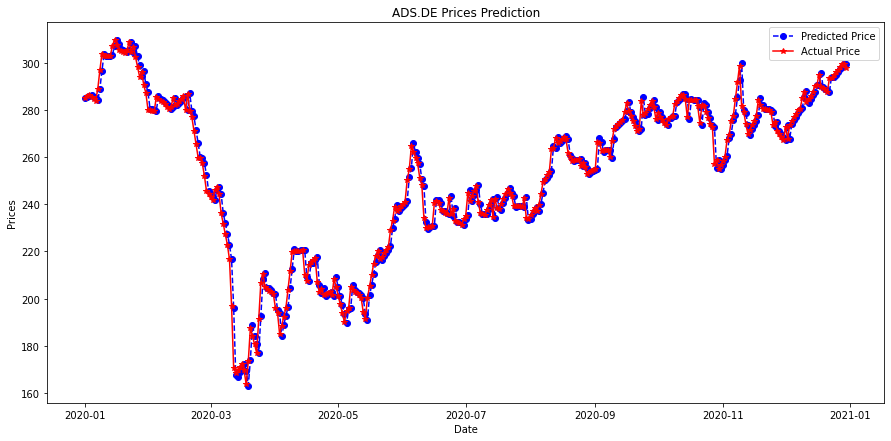

In [211]:
split_sample = 0.80 # 4 years for training, 1 year of test.

symbol = 'ADS.DE'
ads_de = df[[symbol]]

train_data, test_data = ads_de[0:int(len(ads_de[symbol])*split_sample)], ads_de[int(len(ads_de[symbol])*split_sample):]
print(f"The length of training is {len(train_data.values)}, the length of test is {len(test_data.values)}")

training_data = train_data[symbol].values
test_data = test_data[symbol].values

history = [x for x in training_data]
model_predictions = []

N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast() ## Predict just the next value. The output has - prediction, standard error, confident interval of prediction -.
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error (MSE) is {}'.format(MSE_error))
print('Testing Root Mean Squared Error (RMSE)is {}'.format(math.sqrt(MSE_error)))

test_set_range = ads_de[symbol][int(len(ads_de[symbol])*split_sample):].index

plt.figure(figsize=(15, 7))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', marker='*', label='Actual Price')
plt.title(f'{symbol} Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

This model gives one RMSE of 4.54. The model predict the next value, and use the actual value to predict the next one. In our project we will evaluate a RMSE based on the prediction of the next 5 days, so we will be setting up the horizon to 5, in comparison with 1 here.

In the Prices prediction chart, we observe that most of the predictions comes with a delay of one day, it means, based on last the last value will be the next predicted.

In the next tables we show thee summary result of the ARIMA model. This model here has not been opmized yet. The optimization is done in `hyperparameter_tuning.ipynb` and the best values are used in `models_class.py` as default values. This also applies for the other 2 models.

In [209]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1821
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -4525.850
Method:                       css-mle   S.D. of innovations              2.905
Date:                Sat, 30 Jan 2021   AIC                           9063.699
Time:                        20:55:30   BIC                           9096.742
Sample:                             1   HQIC                          9075.889
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1204      0.077      1.554      0.120      -0.031       0.272
ar.L1.D.y      0.0961      0.023      4.102      0.000       0.050       0.142
ar.L2.D.y      0.0372      0.024      1.580      0.114      -0.009       0.083
ar.L3.D.y     -0.0091      0.024     -0.387      0.699      -0.055       0.037
ar.L4.D.y     -0.0029      0.023     -0.125      0.901      -0.049       0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.9055           -2.1817j            3.6334           -0.1025
AR.2            2.9055           +2.1817j            3.6334            0.1025
AR.3           -4.4659           -2.4526j            5.0950           -0.4201
AR.4           -4.4659           +2.4526j            5.0950            0.4201
-----------------------------------------------------------------------------
"""

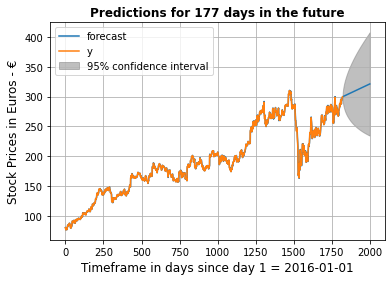

In [210]:
model_fit.plot_predict(1,2000)
plt.legend(bbox_to_anchor=(0.5, 1))
plt.title(f"Predictions for {2000-len(ads_de)} days in the future", fontweight='bold')
plt.xlabel("Timeframe in days since day 1 = 2016-01-01", fontsize=12)
plt.ylabel("Stock Prices in Euros - €", fontsize=12)
plt.grid();

Here we can see how what is the prediction tendency, it is, the symbol tends to continue increasing positively.

--------------
**Summary of the model done**:

- A rolling forecasting procedure is required given the dependence on observations in prior time steps for differencing and the AR model. To this end, we re-create the ARIMA model after each new observation is received.
- Finally, we manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended at each iteration.
- We just forecast one observation per time.
- We observe that our predictions are going with one day delay as they forecast try to predict based on the change of the last observation.
- The forecast is not able to predict possible changes, just small variations from the last observation.
---------

## Modeling with Prophet

**What is Prophet?**

It's the publicly available model that Facebook data science team developed as an attempt to develop a model that could capture seasonality in time-series data. Prophet is able to capture daily, weekly and yearly seasonality along with holiday effects by implementing additive regression models. The mathematical equation behind the model is:

`y(t) = g(t) + s(t) + h(t) + e(t)`

with:
- g(t) the trend. Prophet uses a piecewise linear model for trend forecasting.
- s(t) represents periodic changes (weekly, monthly, yearly).
- h(t) is the effect of holidays.
- e(t) is the error term.

Prophet also deals with missing values and outliers. However, as we already imputed the data, we will add full new dataframe.

More about Prophet library: https://github.com/facebook/prophet

As the comparison is shown in the `results.ipynb` we will use now another symbol in order to predict the stock prices. For example, we will use now `MTX.DE`.

Prophet model needs to read the data with one already predefined name, therefore, we will start from there.

In [224]:
# libraries used to model Prophet
from fbprophet import Prophet

In [246]:
symbol = 'MTX.F'

mtx_de = df[[symbol]]

mtx_de.reset_index(inplace=True)
mtx_de = mtx_de.rename(columns = {"Date":"ds", symbol:"y"}) 

In [247]:
train_data, test_data = mtx_de[0:int(len(mtx_de)*split_sample)], mtx_de[int(len(mtx_de)*split_sample):]
print(f"The length of training is {len(train_data.values)}, the length of test is {len(test_data.values)}")

The length of training is 1458, the length of test is 365


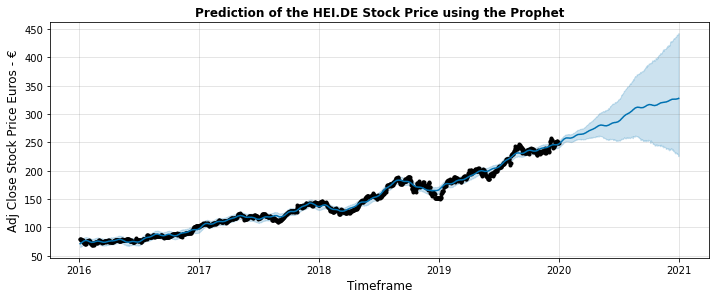

In [277]:
model = Prophet(daily_seasonality = True) # the Prophet class (model)
model.fit(train_data) # fit the model using all data

future = model.make_future_dataframe(periods=366) #we need to specify the number of days in future
prediction = model.predict(future)

model.plot(prediction, figsize=(10,4))
plt.title(f"Prediction of the {symbol} Stock Price using the Prophet", fontweight='bold')
plt.xlabel("Timeframe", fontsize=12)
plt.ylabel("Adj Close Stock Price Euros - €", fontsize=12)
plt.show();

The blue shadow is the confident interval of the model . We see that after a quarter, the model is not confident enough with the predictions as they are too further on time. Prophet has also some nice methods to see the seasonality of the timeseries. Let's see.

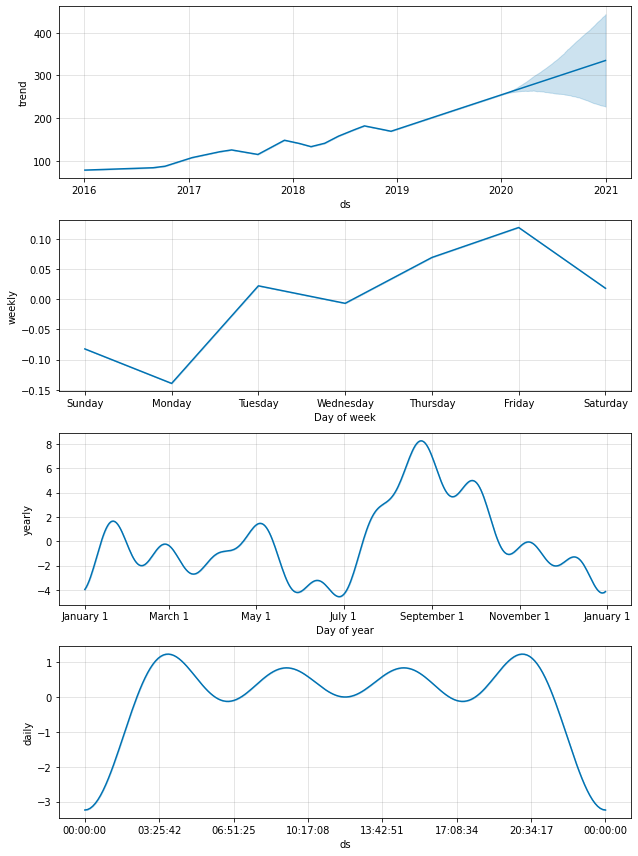

In [249]:
model.plot_components(prediction)
plt.show()

Here we can see that usually fridays the prices are higher and lower for mondays. We can also see that July is the month with lower price and september the higher. From the first one, we can also see that the stock price increase more and more each year. This is a really nice graph and a very big plus from prophet library due to how easy it's to use.

In [251]:
MSE_error = mean_squared_error(test_data['y'], prediction['yhat'][prediction.ds > '2020-01-01'])
RMSE_error = math.sqrt(MSE_error)

print(f'Testing Mean Squared Error (MSE) is {round(MSE_error, 4)}.')
print(f'Testing Root Mean Squared Error (RMSE)is {round(RMSE_error, 4)}.\n')

Testing Mean Squared Error (MSE) is 17293.1726.
Testing Root Mean Squared Error (RMSE)is 131.5035.



In this case, the RMSE is 131.5. Let's remember we can not compare both computed RMSE because they are not percentage of error.

## Modeling with Neural Network - LSTM

Recurrent Neural Network like LSTM that explicitly handles the order between observations when learning a mapping function from inputs to output. They also learn temporal dependence. We will start from the simplest model of LSTM and try to improve the structure by different layers. The simplest is the Vanilla LSTM with just one single hidden layer of LSTM units:

`X → LSTM Layer → Dense Layer → Forecast (y_hat)`

The next structure to try is the Stacked LSTM:

`X → LSTM Layer → LSTM Layer → Dense Layer → Forecast (y_hat)`

We could also try the Bidirectional LSTM that could be beneficial as it learns the input sequence from both forward and backwards.

`X → Bidirectional LSTM Layer → Dense Layer → Forecast (y_hat)`

### LSTM model

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (e.g. images), but also entire sequences of data (such as speech or video inputs).

LSTM models are able to store information over a period of time. This characteristic is extremely useful when we deal with Time-Series or Sequential Data. When using an LSTM model we are free and able to decide what information will be stored and what discarded. We do that using the “gates”.

As we did for the other 2 models, we will explore split the sample here into train with 4 years and test with the latest year. Also, we will use another different symbol for this part, for example `HEI.DE`.

The data preparation for the LSTM is more complex than the other 2 methods. This one, we will use X `time_steps` to predict the next value. Therefore we will have to reshape the data set to create a new one that contains the data in the shape: `(#values, #time-steps, # 1)`

In [268]:
# libraries used for LSTM model
from sklearn.preprocessing import MinMaxScaler
from fbprophet import Prophet
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional


In [269]:
symbol = 'HEI.DE'

hei_de = df[[symbol]]

training_hei_de = hei_de[hei_de.index < '2020-01-01']
test_hei_de = hei_de[hei_de.index >= '2020-01-01']

time_steps = 60

# prepare train data
training_set = hei_de.iloc[:len(training_hei_de), 0:1].values
test_set = hei_de.iloc[len(training_hei_de):, 0:1].values

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_hei_de)):
    X_train.append(training_set_scaled[i-time_steps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(f"X_train={X_train.shape} and y_train={y_train.shape}") # (#values, #time-steps, #1 dimensional output).

X_train=(1398, 60, 1) and y_train=(1398,)


In [270]:
# Prepare Test data
dataset_train = hei_de.iloc[:len(training_set), 0:1]
dataset_test = hei_de.iloc[len(training_hei_de):, 0:1]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test, y_test = [], []
for i in range(60, len(test_hei_de)+60):
    X_test.append(inputs[i-time_steps:i, 0])
    y_test.append(inputs[i,0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"X_train={X_test.shape} and y_train={y_test.shape}") # (#values, #time-steps, #1 dimensional output).

X_train=(365, 60, 1) and y_train=(365,)


In [271]:
def train_LSTM_nn(X_train, y_train, units, dropout, optimizer, loss, epochs, batch_size, horizon=1):
    model = Sequential()
    #Adding the first LSTM layer and some Dropout regularisation
    model.add(LSTM(units = units, return_sequences = False, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(dropout))
    # Adding the output layer
    model.add(Dense(units=30, activation='sigmoid'))
    model.add(Dense(units = horizon))

    # Compiling the RNN
    model.compile(optimizer = optimizer, loss = loss)

    # Fitting the RNN to the Training set
    model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)
    
    return model

In [272]:
model = train_LSTM_nn(X_train, y_train, units=50, dropout=0.2, optimizer='adam', loss='mean_squared_error',
                     epochs = 50, batch_size = 32)

print(model.summary())

Epoch 1/50
44/44 [==============================] - 2s 13ms/step - loss: 0.2584
Epoch 2/50
44/44 [==============================] - 1s 12ms/step - loss: 0.0122
Epoch 3/50
44/44 [==============================] - 1s 12ms/step - loss: 0.0056
Epoch 4/50
44/44 [==============================] - 1s 12ms/step - loss: 0.0050
Epoch 5/50
44/44 [==============================] - 1s 12ms/step - loss: 0.0046
Epoch 6/50
44/44 [==============================] - 1s 12ms/step - loss: 0.0047
Epoch 7/50
44/44 [==============================] - 1s 12ms/step - loss: 0.0040
Epoch 8/50
44/44 [==============================] - 1s 12ms/step - loss: 0.0036
Epoch 9/50
44/44 [==============================] - 1s 12ms/step - loss: 0.0034
Epoch 10/50
44/44 [==============================] - 1s 12ms/step - loss: 0.0035
Epoch 11/50
44/44 [==============================] - 1s 12ms/step - loss: 0.0030
Epoch 12/50
44/44 [==============================] - 1s 12ms/step - loss: 0.0029
Epoch 13/50
44/44 [==================

In [273]:
#Model error
score_test = model.evaluate(X_test, y_test, batch_size = 32)

print(f"The RMSE in test set is {round(math.sqrt(score_test), 2)}.")

12/12 [==============================] - 1s 16ms/step - loss: 0.0025
The RMSE in test set is 0.05.


In [274]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y_test_inverted = sc.inverse_transform(np.array(y_test).reshape(-1,1)) # invert the MinMax transformation to get the inital values

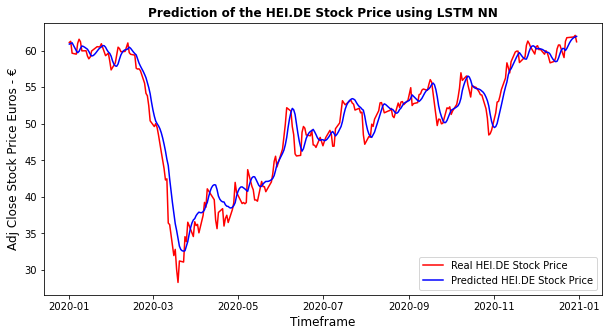

In [278]:
# Visualising the results
hei_de.reset_index(inplace=True)
plt.figure(figsize=(10,5))

plt.plot(hei_de.loc[len(training_hei_de):, 'Date'], dataset_test.values, color = 'red', label = f'Real {symbol} Stock Price')
plt.plot(hei_de.loc[len(training_hei_de):, 'Date'], predicted_stock_price, color ='blue', label = f'Predicted {symbol} Stock Price')
# plt.xticks(np.arange(0,306,50))
plt.title(f"Prediction of the {symbol} Stock Price using LSTM NN", fontweight='bold')
plt.xlabel("Timeframe", fontsize=12)
plt.ylabel("Adj Close Stock Price Euros - €", fontsize=12)
plt.legend()
plt.show()

### Volatility and Measures of Risk-Adjusted Return

**Volatility** is the risk of an asset.

**Sharpe ratio** was introduced in 1966 by Nobel laureate William F. Sharpe and is a measure for calculating risk-adjusted return. 
The Sharpe ratio is the average return earned in excess of the free-risk rate per unit of volatility.

`Sharpe ratio = (Mean return − Risk-free rate) / Standard deviation of return`

Firstly, we will evaluate the metrics with one symbol, for example `DAI.DE`.


In [280]:
def sharpe_ratio(returns, rf, days=252):
    """ Compute the sharpe ratio 
    params: returns: returns from the investment
    params: risk-free rate(rf)
    return sharpe ratio
    """
    sharpe_ratio = np.sqrt(days) * (returns.mean() - rf) / returns.std()
    return sharpe_ratio 

In [281]:
symbol = 'DAI.DE'
dai_de = df[[symbol]]

In [289]:
number_of_stocks = 1000 # example if you have 1k stocks for this symbol

dai_de['Returns'] = dai_de / dai_de.shift(1)
dai_de['Norm return'] = dai_de[symbol] / dai_de.iloc[0][symbol] # normalized return that's each price divided by the close price in the data.
dai_de['Position'] = dai_de['Norm return'] * number_of_stocks # portfolio position with acquired stocks
dai_de['Daily Return'] = dai_de['Position'].pct_change(1)

In [290]:
dai_de

,DAI.DE,Returns,Norm return,Position,Daily Return
Date,,,,,
2016-01-04,55.673573,NaN,1.000000,1000.000000,NaN
2016-01-05,55.666012,0.999864,0.999864,999.864195,-0.000136
2016-01-06,54.252247,0.974603,0.974470,974.470370,-0.025397
2016-01-07,52.165627,0.961539,0.936991,936.990822,-0.038461
2016-01-08,51.553246,0.988261,0.925991,925.991331,-0.011739
...,...,...,...,...,...
2020-12-26,58.598001,1.000444,1.052528,1052.528128,0.000444
2020-12-27,58.624001,1.000444,1.052995,1052.995140,0.000444
2020-12-28,58.650002,1.000444,1.053462,1053.462152,0.000444


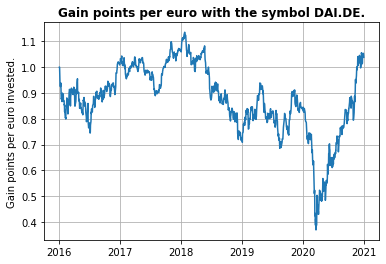

In [291]:
plt.figure(figsize=(6,4))
plt.plot(dai_de['Norm return'])
plt.title(f"Gain points per euro with the symbol {symbol}.", fontweight='bold')
plt.ylabel("Gain points per euro invested.")
plt.grid();

In [292]:
cumulative_return = 100 * (dai_de['Position'][-1] / dai_de['Position'][0] -1)
print(f"Your cumulative return was {cumulative_return:.2f}%")


Your cumulative return was 3.80%


In [295]:
print(f"The sharpe_ratio in a year is {sharpe_ratio(dai_de['Daily Return'], rf=0, days=len(dai_de)):.2f}") # assume risk free rate 0 as the interest rates are so low nowadays

The sharpe_ratio in a year is 0.39


In this way, we see that for the whole timeframe of the data, this company has a sharpe ratio of 0.39. Probably due to the massive drop in march 2020, this coeffient is so low. 
We will compare for this case in 3 different timeframes defined as follows:
    
- SP Lifetime is computed from the 1st January 2016 until 31st December 2020, counting only trading days. Weekends and holidays are not counting for the computation of this metric. 
- So accordingly, the Sharpe ratio from 2019 would include trading days for 2019 and 2020.
- The SR 2020 is computed for the trading days belonging just to the year 2020.

Please take into account that we will compute the value with the data already imputed in this notebook.

In [304]:
def compute_sharpe_ratios(df, year):

    sharpe_ratios = {}
    df_year = df[df.index >= year]

    for company in LIST_DAX_COMPANIES:
        sharpe_r = df_year[[company]].dropna()
        sharpe_r['Norm return'] = sharpe_r[company] / sharpe_r.iloc[0][company] # normalized return that's each price divided by the close price in the data.
        sharpe_r['Daily Returns'] = sharpe_r['Norm return'].pct_change(1)
        sharpe_ratios[company] = sharpe_ratio(sharpe_r['Daily Returns'], rf=0, days=len(sharpe_r))
    
    return sharpe_ratios

In [305]:
sharpe_ratios_lifetime = compute_sharpe_ratios(df, '2016-01-01')
sharpe_ratios_2019 = compute_sharpe_ratios(df, '2019-01-01')
sharpe_ratios_2020 = compute_sharpe_ratios(df, '2020-01-01')

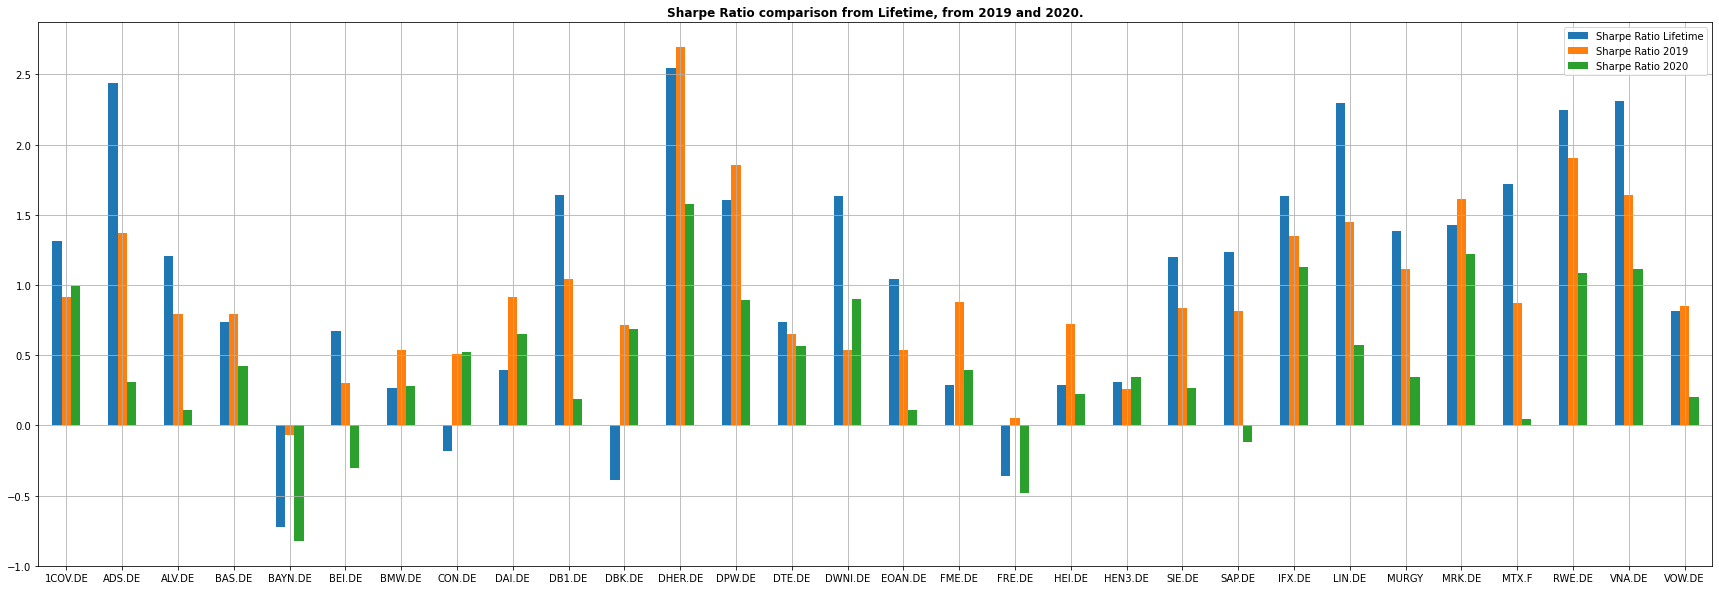

In [306]:
sharpe_ratio_lifetime = pd.DataFrame.from_dict(sharpe_ratios_lifetime, orient='index',columns=['Sharpe Ratio Lifetime'])
sharpe_ratio_2019 = pd.DataFrame.from_dict(sharpe_ratios_2019, orient='index',columns=['Sharpe Ratio 2019'])
sharpe_ratio_2020 = pd.DataFrame.from_dict(sharpe_ratios_2020, orient='index',columns=['Sharpe Ratio 2020'])

sharpe_results = sharpe_ratio_lifetime.join(sharpe_ratio_2019)
sharpe_results = sharpe_results.join(sharpe_ratio_2020)

sharpe_results.plot.bar(rot=0, figsize=(30,10))
plt.title("Sharpe Ratio comparison from Lifetime, from 2019 and 2020.", fontweight='bold')
plt.grid()

plt.savefig('sharpe_ratio_comparison.png', orientation='landscape', pad_inches=0);

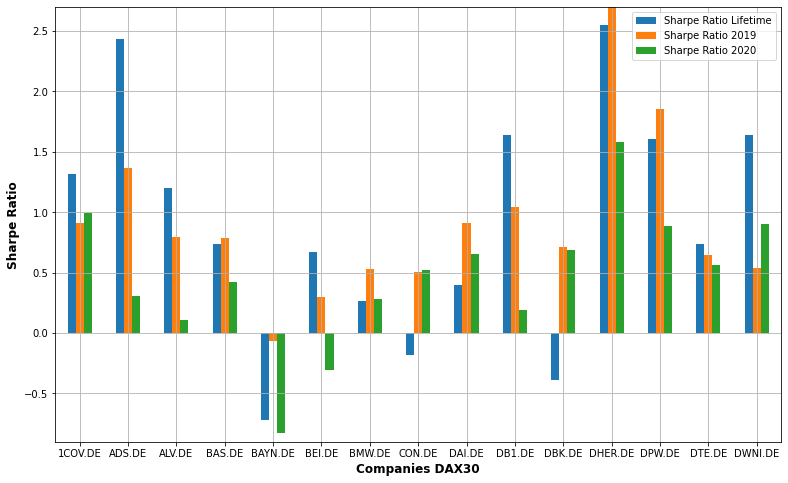

In [318]:
sharpe_results.iloc[0:15, :].plot.bar(rot=0, figsize=(13,8)).set_ylim(-0.9, 2.7)
plt.grid()
plt.xlabel("Companies DAX30", fontsize=12, fontweight='bold')
plt.ylabel("Sharpe Ratio", fontsize=12, fontweight='bold');

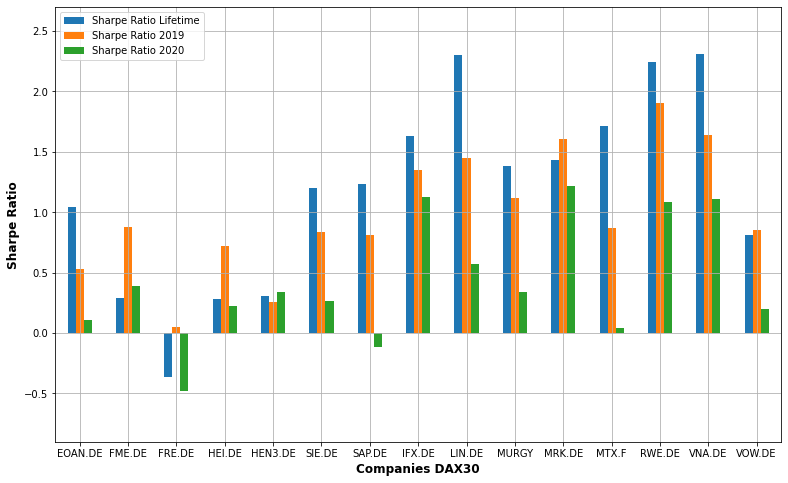

In [319]:
sharpe_results.iloc[15:, :].plot.bar(rot=0, figsize=(13,8)).set_ylim(-0.9, 2.7)
plt.grid()
plt.xlabel("Companies DAX30", fontsize=12, fontweight='bold')
plt.ylabel("Sharpe Ratio", fontsize=12, fontweight='bold');

In [309]:
list_to_visualize = ['DHER.DE', 'RWE.DE', '1COV.DE', 'BEI.DE', 'FRE.DE']

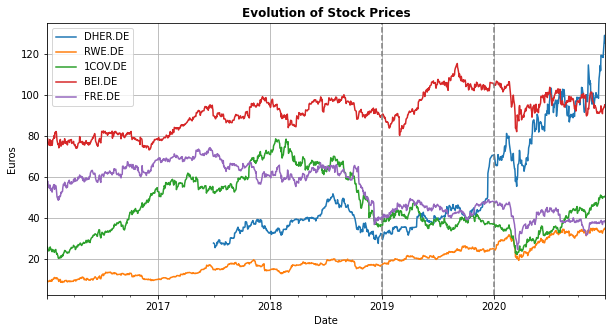

In [310]:
df[list_to_visualize].plot(rot=0, figsize=(10,5))
plt.grid()
plt.title("Evolution of Stock Prices", fontweight='bold')
plt.ylabel("Euros")
plt.axvline("2019-01-01", color='grey', linestyle='--')
plt.axvline("2020-01-01", color='grey', linestyle='--')
plt.savefig('evolution_stock_selected_symbols.png', orientation='landscape', pad_inches=0);

The ones with better SP have a higher return of investment as they see a continuously increasing tendency. 1COV.DE has a very good performance in the 3 first years and worst in the last 2 years. FRE.DE continuously decreases.

If we were investors that decided to invest just based on Sharpe Ratio, from all the DAX-30 we would choose Delivery Hero AG as the next company from DAX to include in our portfolio.
